<a href="https://colab.research.google.com/github/HoseinNekouei/Predict_EUR_USD/blob/main/Predict_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basilica Finance

**Objective:** The primary goal of this project is to extract Forex price data for the EUR/USD currency pair and develop a predictive model to determine whether the next candle (price movement) will be positive or negative.

**Expected Outcomes:**
A robust model that accurately predicts the direction of the next candle for EUR/USD.
A comprehensive report detailing the methodology, analysis, and findings.

## Step 1 Data Collection:
   In May 2010, the financial markets experienced a sudden and severe crash, known as the "Flash Crash." In just a few minutes, the Dow Jones Industrial Average plunged about 1,000 points only to recover those losses shortly after. This event is a crucial example in the world of trading and data analysis.

The Flash Crash highlighted the critical role of data quality and integrity in financial markets. In the chaotic moments of the crash, many automated trading algorithms, including those used in Forex trading, were making decisions based on flawed or aberrant data. This led to a cascade of selling, exacerbating the market's instability.

 Post-crash analyses revealed that many trading models were not equipped to handle such unusual market conditions. They were trained on historical data that did not include such extreme scenarios. This oversight led to massive failures in predictive models, causing significant financial losses.

The Flash Crash served as a wake-up call for financial analysts, traders, and data scientists. It underscored the need for robust data preprocessing and the inclusion of outlier scenarios in model training. It also highlighted the importance of 'stress testing' models against extreme market conditions, something that many Forex predictive models lacked at the time.

Following the Flash Crash, there was a renewed emphasis on improving the quality of data used in trading algorithms and on developing more resilient models that could handle market anomalies. This event has since been a case study in the importance of data quality and the need for comprehensive and realistic model training in the Forex market.


In the execution of this project, you are granted the flexibility to utilize any relevant data sets at your discretion. However, it is imperative to exercise vigilance regarding potential data leakage and ensure strict adherence to chronological integrity. Under no circumstances should data from future timeframes be employed in the model development process. This caution is critical to maintain the validity and reliability of the predictive outcomes of our models.

In [ ]:
import pandas_datareader as pdr
import pandas as pd

# Define my Tiingo API key
key='b79d2d10430e13474208c27ea25094f945791c78'

# Retrieve  data from Tiingo API for the 'eurusd' currency pair
data = pdr.get_data_tiingo('eurusd', api_key=key)

# save the data to a CSV file
data.to_csv('eurusd.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv('eurusd.csv')

<ipython-input-1-7c28896c8284>:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pdr.get_data_tiingo('eurusd', api_key=key)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1571 non-null   object 
 1   date         1571 non-null   object 
 2   close        1571 non-null   float64
 3   high         1571 non-null   float64
 4   low          1571 non-null   float64
 5   open         1571 non-null   float64
 6   volume       1571 non-null   int64  
 7   adjClose     1571 non-null   float64
 8   adjHigh      1571 non-null   float64
 9   adjLow       1571 non-null   float64
 10  adjOpen      1571 non-null   float64
 11  adjVolume    1571 non-null   int64  
 12  divCash      1571 non-null   float64
 13  splitFactor  1571 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 172.0+ KB


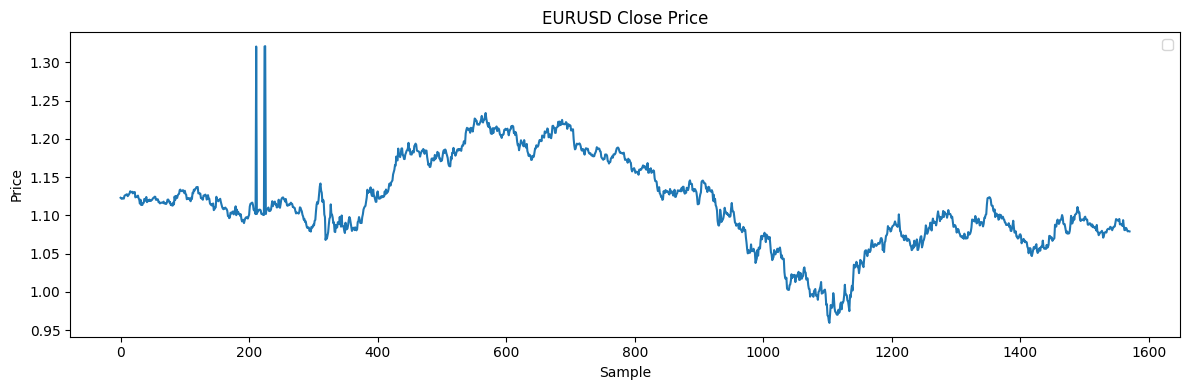

In [ ]:
import matplotlib.pyplot as plt

# Display information about the DataFrame
df.info()

# Plot the 'close' column
plt.figure(figsize=(12,4))
plt.plot(df['close'])
plt.title('EURUSD Close Price')
plt.xlabel('Sample')
plt.ylabel('Price')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df.tail(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1561,eurusd,2024-03-21 00:00:00+00:00,1.086205,1.094265,1.085565,1.093735,0,1.086205,1.094265,1.085565,1.093735,0,0.0,1.0
1562,eurusd,2024-03-22 00:00:00+00:00,1.080800,1.086815,1.080185,1.086225,0,1.080800,1.086815,1.080185,1.086225,0,0.0,1.0
1563,eurusd,2024-03-24 00:00:00+00:00,1.080735,1.081065,1.080590,1.080875,0,1.080735,1.081065,1.080590,1.080875,0,0.0,1.0
1564,eurusd,2024-03-25 00:00:00+00:00,1.083705,1.084245,1.080230,1.080740,0,1.083705,1.084245,1.080230,1.080740,0,0.0,1.0
1565,eurusd,2024-03-26 00:00:00+00:00,1.083265,1.086435,1.082440,1.083695,0,1.083265,1.086435,1.082440,1.083695,0,0.0,1.0
1566,eurusd,2024-03-27 00:00:00+00:00,1.081255,1.083910,1.081025,1.083255,0,1.081255,1.083910,1.081025,1.083255,0,0.0,1.0
1567,eurusd,2024-03-28 00:00:00+00:00,1.079145,1.082670,1.077525,1.081265,0,1.079145,1.082670,1.077525,1.081265,0,0.0,1.0
1568,eurusd,2024-03-29 00:00:00+00:00,1.079330,1.080540,1.076830,1.079150,0,1.079330,1.080540,1.076830,1.079150,0,0.0,1.0
1569,eurusd,2024-03-31 00:00:00+00:00,1.079320,1.079715,1.078575,1.078855,0,1.079320,1.079715,1.078575,1.078855,0,0.0,1.0
1570,eurusd,2024-04-01 00:00:00+00:00,1.079035,1.079885,1.078485,1.079325,0,1.079035,1.079885,1.078485,1.079325,0,0.0,1.0


## Step 2 Data cleaning and quality checking
Given the data acquired thus far, it is essential to ascertain whether there exists a necessity for data cleansing procedures. What methodologies or criteria will be implemented to evaluate the quality of the collected data? This assessment is crucial to ensure the integrity and efficacy of our data-driven analysis and subsequent model development.

In [ ]:
import numpy as np

# Calculate the z-score for each data point in the 'close' column
z_scores = np.abs((df['close'] - df['close'].mean()) / df['close'].std())

# Define a threshold for anomaly detection
threshold = 3

# Identify anomalies
anomalies = df['close'][z_scores > threshold]

# Print the anomalous data points
print(f'Anomalies: {anomalies}\n')

# Delete columns
df.drop(columns = ['symbol', 'volume', 'adjVolume', 'divCash', 'splitFactor'], inplace= True)

# Get index of anomalous data points
idxs = anomalies.index

# drop anomalous data points
df.drop(idxs, inplace= True)

df.info()


Anomalies: 211    1.320510
224    1.320595
225    1.320985
Name: close, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1570
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1568 non-null   object 
 1   close     1568 non-null   float64
 2   high      1568 non-null   float64
 3   low       1568 non-null   float64
 4   open      1568 non-null   float64
 5   adjClose  1568 non-null   float64
 6   adjHigh   1568 non-null   float64
 7   adjLow    1568 non-null   float64
 8   adjOpen   1568 non-null   float64
dtypes: float64(8), object(1)
memory usage: 122.5+ KB


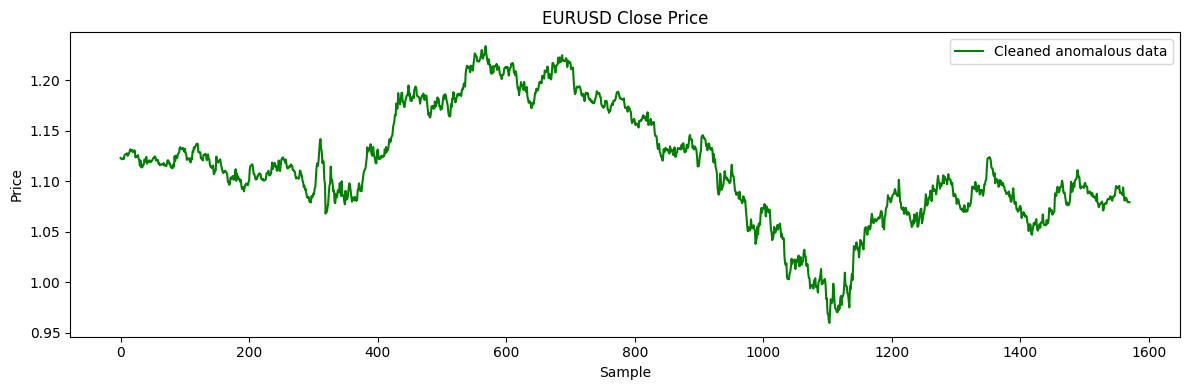

In [ ]:
# Plot the 'close' column after clean data
plt.figure(figsize=(12,4))
plt.plot(df['close'], label ='Cleaned anomalous data', color= 'green')
plt.title('EURUSD Close Price')
plt.xlabel('Sample')
plt.ylabel('Price')

plt.legend()
plt.tight_layout()
plt.show()

## Step 3 Feature Enginnering And Data Labelling

- ### Is price data enough to enable the model to make accurate predictions?
- ### Does the data contain enough information to enable accurate model training?
Price data, typically including open, high, low, and close prices, along with volume, is fundamental in Forex trading models. However, relying solely on this data might not always suffice for accurate predictions.
Forex markets are influenced by a plethora of factors, including economic indicators, geopolitical events, and market sentiment. Therefore, price data alone might not capture the full spectrum of influences affecting market movements.


- ### What are the other data sources that can be used to engineer features?
 - Technical Indicators: Derive technical indicators like Moving Averages, Relative Strength Index (RSI), Bollinger Bands, and MACD. These indicators can help capture trends, momentum, volatility, and market strength.
 - Statistical Features: Use statistical measures like rolling mean, standard deviation, and z-scores over different time windows to capture market dynamics.
 - Time-Based Features: Incorporate features like time of day, day of the week, and proximity to major financial events, as Forex markets can exhibit time-based patterns.
  - ??

In [ ]:
# Create a empty DataFrame
df_temp = pd.DataFrame({})

# Calculate price changes
df_temp['price_change'] = df['close'].diff()

# Define the time period
period = 14

# Calculate gains and losses
df_temp['gain'] = df_temp['price_change'].apply(lambda x: x if x > 0 else 0)
df_temp['loss'] = df_temp['price_change'].apply(lambda x: abs(x) if x < 0 else 0)

# Calculate average gains and losses
df_temp['avg_gain'] = df_temp['gain'].rolling(window=period).mean()
df_temp['avg_loss'] = df_temp['loss'].rolling(window=period).mean()

# Calculate relative strength (RS)
df_temp['RS'] = df_temp['avg_gain'] / df_temp['avg_loss']

# Calculate RSI
df['RSI'] = 100 - (100 / (1 + df_temp['RS']))

# Replace the RSI values for the first 12 rows based on the RSI value at index 13
df.loc[:13, 'RSI'] = df['RSI'][13]

# Print the RSI values
print(df.loc[:14, 'RSI'])

0     66.686058
1     66.686058
2     66.686058
3     66.686058
4     66.686058
5     66.686058
6     66.686058
7     66.686058
8     66.686058
9     66.686058
10    66.686058
11    66.686058
12    66.686058
13    66.686058
14    70.156968
Name: RSI, dtype: float64


In [ ]:
# Define the short-term and long-term periods
short_period = 12
long_period = 26
signal_period = 9

# Calculate short-term EMA
df_temp['short_EMA'] = df['close'].ewm(span=short_period, min_periods=1, adjust=False).mean()

# Calculate long-term EMA
df_temp['long_EMA'] = df['close'].ewm(span=long_period, min_periods=1, adjust=False).mean()

# Calculate MACD line
df['MACD'] = df_temp['short_EMA'] - df_temp['long_EMA']

In [ ]:
# Define the period for Momentum calculation
momentum_period = 14

# Calculate Momentum
df['momentum'] = df['close'] - df['close'].shift(momentum_period)

# Replace the momentum values for the first 14 rows based on the momentum value at index 15
df.loc[:14, 'momentum'] = df['momentum'][14]

print(df.loc[:16, 'momentum'])

0     0.005975
1     0.005975
2     0.005975
3     0.005975
4     0.005975
5     0.005975
6     0.005975
7     0.005975
8     0.005975
9     0.005975
10    0.005975
11    0.005975
12    0.005975
13    0.005975
14    0.005975
15    0.009343
16    0.008726
Name: momentum, dtype: float64


In [ ]:
# Filter for hanging man patterns where RSI > 70
bullish_hanging_man = df[(df['RSI'] > 70) &
                   (df['open'] > df['close']) &
                   (df['close'] - df['low'] > 2 * (df['open'] - df['close'])) &
                   (df['high'] - df['close'] <= 0.1 * df['close'])]


bearish_hanging_man = df[(df['RSI'] < 30) &
                   (df['open'] < df['close']) &
                   (df['close'] - df['low'] > 2 * (df['open'] - df['close'])) &
                   (df['high'] - df['close'] <= 0.1 * df['close'])]

# Add a binary column indicating the presence of a hanging man pattern
df['hanging_man'] = 0
df.loc[bullish_hanging_man.index, 'hanging_man'] = 1
df.loc[bearish_hanging_man.index, 'hanging_man'] = 1

print(df['hanging_man'].value_counts())
count_hanging_man = len(df[df['hanging_man']>0].loc[:200,'RSI'])

0    1473
1      95
Name: hanging_man, dtype: int64


In [ ]:
# Filter for emotional range in RSI
bullish_emotional_range = df[df['RSI']> 70]
bearish_emotional_range = df[df['RSI']<30]

# Add a binary column indicating the presence of a RSI's emotional range pattern
df['emotional_range'] = 0.0
df.loc[bullish_emotional_range.index, 'emotional_range'] = df['RSI']
df.loc[bearish_emotional_range.index, 'emotional_range'] = df['RSI']

print(df[df['emotional_range']> 0].iloc[:10, -1])

14    70.156968
15    78.259541
16    75.444030
17    74.498428
18    74.934897
29    24.015498
30    19.961905
32    26.260211
33    29.759709
34    26.835219
Name: emotional_range, dtype: float64


In [ ]:
# Calculate RSI change
df_temp['RSI_change'] = df['RSI'].diff()

# Calculate bullish divergence
df['bullish_divergence'] = ((df_temp['price_change'] < 0) &
                                  (df_temp['RSI_change'] > 0) &
                                   (df['RSI']>70)).astype(int)

# Calculate bearish divergence
df['bearish_divergence'] = ((df_temp['price_change'] > 0) &
                            (df_temp['RSI_change'] < 0) &
                             (df['RSI'] < 30)).astype(int)

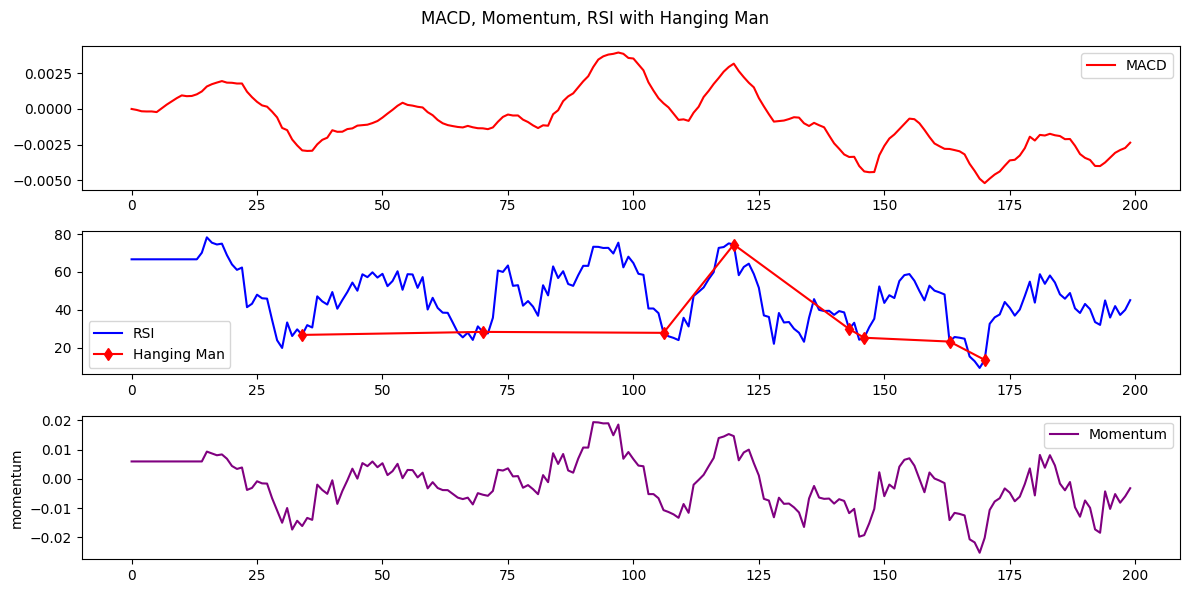

In [ ]:
# Create subplots
plt.figure(figsize=(12,6))

# Plot MACD
plt.subplot(3,1,1)
plt.plot(df['MACD'][:200], label='MACD', color='red')
plt.legend()

# Plot RSI
plt.subplot(3,1,2)
plt.plot(df['RSI'][:200], label= 'RSI', color='blue')
plt.plot(df[df['hanging_man']> 0].loc[:200, 'RSI'], label= 'Hanging Man', color='red', marker ='d')
plt.legend()

# plot Mommentom
plt.subplot(3,1,3)
plt.plot(df['momentum'][:200], label= 'Momentum', color='purple')
plt.ylabel('momentum')
plt.legend()

# Set title
plt.suptitle('MACD, Momentum, RSI with Hanging Man')

# Adjust layout
plt.tight_layout()

# Show Plot
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1570
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1568 non-null   object 
 1   close               1568 non-null   float64
 2   high                1568 non-null   float64
 3   low                 1568 non-null   float64
 4   open                1568 non-null   float64
 5   adjClose            1568 non-null   float64
 6   adjHigh             1568 non-null   float64
 7   adjLow              1568 non-null   float64
 8   adjOpen             1568 non-null   float64
 9   RSI                 1568 non-null   float64
 10  MACD                1568 non-null   float64
 11  momentum            1568 non-null   float64
 12  hanging_man         1568 non-null   int64  
 13  emotional_range     1568 non-null   float64
 14  bullish_divergence  1568 non-null   int64  
 15  bearish_divergence  1568 non-null   int64  
dtypes: flo

In [ ]:
# Extracing the features from data DataFrame where features are all columns starting from the seconnd column
features = df.iloc[:, 2:]

# Extracing the labels from data DataFrame located in the third column
labels = df.iloc[:, 1]

# Reshape the 'labels' array to have a single column
labels = np.array(labels).reshape(-1, 1)

print(f"Features' shape: {features.shape}")
print(f"Labels' shape: {labels.shape}")

Features' shape: (1568, 14)
Labels' shape: (1568, 1)


## Step 3 Train Test Split

In the context of our project's methodology, the concept of 'train-test split' is a critical procedure in the development of predictive models. This process involves dividing the collected data into two distinct sets: the training set and the test set.

**Training Set:** This subset of data is utilized for the initial development and training of the model. It is through this dataset that the model learns the underlying patterns and relationships, essentially 'training' the algorithm to understand and interpret the data. The size of the training set typically ranges from 60% to 80% of the total dataset, depending on the specific requirements and complexity of the model.

**Test Set:** The remaining portion of the data, which is not used in the training phase, constitutes the test set. This set is crucial for evaluating the performance and generalizability of the model. It serves as a new, unseen dataset for the model, allowing us to assess how well the model can apply its learned patterns to new data. The test set typically comprises 20% to 40% of the total dataset.

**Objective of Train-Test Split:** The primary objective of this split is to prevent overfitting, where a model performs exceptionally well on training data but poorly on new, unseen data. By evaluating the model on the test set, we can gauge its ability to generalize to new data, which is a crucial indicator of its practical applicability.

**Chronological Consideration:** In time-series data, such as Forex market data, it is vital that this split respects the chronological order of the data. This means that the training set consists of earlier data, while the test set comprises the most recent data. Such an approach ensures that the model is not inadvertently exposed to future data during training, maintaining the integrity and relevance of our predictive analysis.

**what is the best way to split the data?**

In [ ]:
# Split data to the train, validation and test samples
num_train_samples = int(0.65 * len(features))
num_val_samples = int(0.10 * len(features))
num_test_samples = int(len(features) - (num_train_samples + num_val_samples))

# display the count of each part of dataset
print(f'number of train sample: {num_train_samples}')
print(f'number of validation sample: {num_val_samples}')
print(f'number of test sample: {num_test_samples}\n')

# Calculdate the mean of features sample along the columns
mean = features[:num_train_samples].mean(axis=0)

# Substracing the mean value from each element in the 'features' aray
features -= mean

# Calculate the standard deviation of the features for the first 'num_train_samples' samples along the columns
standard_deviayin =  features[:num_train_samples].std(axis=0)

# Dividing each element in 'features' array by the standard deviation calculated in the previous step
features /= standard_deviayin

# Display the normalized value for two rows and two columns
print(features.iloc[:3,:])

number of train sample: 1019
number of validation sample: 156
number of test sample: 393

       high       low      open  adjClose   adjHigh    adjLow   adjOpen  \
0 -0.492996 -0.349690 -0.421794 -0.417742 -0.492996 -0.349690 -0.421794   
1 -0.454682 -0.404724 -0.389498 -0.436325 -0.454682 -0.404724 -0.389498   
2 -0.523496 -0.380689 -0.452644 -0.448774 -0.523496 -0.380689 -0.452644   

        RSI      MACD  momentum  hanging_man  emotional_range  \
0  1.064923  0.096219  0.443999    -0.243297        -0.478597   
1  1.064923  0.081279  0.443999    -0.243297        -0.478597   
2  1.064923  0.059734  0.443999    -0.243297        -0.478597   

   bullish_divergence  bearish_divergence  
0           -0.083128            -0.13019  
1           -0.083128            -0.13019  
2           -0.083128            -0.13019  


## Step 4 Model Development

You are free to use any model you want, however the following considerations should be taken into account:

- The model must be able to handle missing data and manage outliers (if any).
- It should be capable of processing time-series data effectively, considering the chronological nature of Forex market data.
- Ensure the model's ability to avoid overfitting, maintaining its predictive accuracy on unseen data. This involves implementing techniques such as cross-validation and regularization.
- The model should be scalable and efficient, capable of processing large volumes of data without excessive computational delays.
Pay attention to the interpretability of the model. It is essential that the model's decision-making process can be understood and explained, especially in a financial context.
- The model must comply with all relevant financial regulations and ethical guidelines, particularly concerning data privacy and the use of predictive algorithms in financial markets.
- Consider the real-time applicability of the model. It should be able to provide timely predictions to be useful in dynamic Forex trading scenarios.
Ensure thorough documentation of the model development process, including the rationale for model choice, data preprocessing steps, and parameter tuning strategies.


In [ ]:
from keras.utils import timeseries_dataset_from_array

sequence_length = 7
sample_rate = 1
delay= sample_rate * (sequence_length + 1 -1)
batch_size = 32

train_dataset = timeseries_dataset_from_array(data= features[:-delay],
                                              targets= labels[delay:],
                                              sequence_length= sequence_length,
                                              sampling_rate= sample_rate,
                                              batch_size= batch_size,
                                              start_index= 0,
                                              end_index= num_train_samples)

val_dataset = timeseries_dataset_from_array(data= features[:-delay],
                                              targets= labels[delay:],
                                              sequence_length= sequence_length,
                                              sampling_rate= sample_rate,
                                              batch_size= batch_size,
                                              start_index= num_train_samples,
                                              end_index= num_train_samples + num_val_samples)

test_dataset = timeseries_dataset_from_array(data= features[:-delay],
                                              targets= labels[delay:],
                                              sequence_length= sequence_length,
                                              sampling_rate= sample_rate,
                                              batch_size= batch_size,
                                              start_index= num_train_samples + num_val_samples)


for sample, target in test_dataset:
    print("samples shape:", sample.shape)
    print("targets shape:", target.shape)
    break

samples shape: (32, 7, 14)
targets shape: (32, 1)


In [17]:
from keras import layers, Model, optimizers
from keras.callbacks import EarlyStopping

epochs = 40

# Define the input layer for the neural network model with the shape determined by the sequence length and the number of features in the input data
inputs = layers.Input(shape= (sequence_length, features.shape[-1]))

# Define the neural network architecture using LSTM layers with dropout regularization
x = layers.GRU(64, recurrent_dropout= 0.25, return_sequences=True)(inputs)
x = layers.GRU(128, recurrent_dropout= 0.25, return_sequences=True)(x)
x = layers.GRU(256, recurrent_dropout= 0.25)(x)

x = layers.Dense(256)(x)
x = layers.Dropout(0.25)(x)

x = layers.Dense(128)(x)
x = layers.Dropout(0.25)(x)

x = layers.Dense(32)(x)
x = layers.Dropout(0.25)(x)

output = layers.Dense(1)(x)

model = Model(inputs, output)

# Define Adam optimizers with learning_rate = 0.0001
opt = optimizers.Adam(learning_rate= 0.0001)

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer= opt, loss='mse', metrics=['mae'])

# Define EarlyStopping callback to monitor validation mean absolute error and prevent overfitting
# early_stopping = EarlyStopping(monitor= 'val_mae', patience= 5, mode='min')

# Train the model on the training dataset with a specified number of epochs and early stopping mechanism
history = model.fit(train_dataset,
                    epochs= epochs,
                    shuffle= True,
                    validation_data= val_dataset)
                    # callbacks= early_stopping)

Epoch 1/40
32/32 [==============================] - 28s 150ms/step - loss: 1.6926 - mae: 1.1860 - val_loss: 0.4886 - val_mae: 0.6860
Epoch 2/40
32/32 [==============================] - 3s 83ms/step - loss: 0.6669 - mae: 0.8001 - val_loss: 0.4227 - val_mae: 0.6411
Epoch 3/40
32/32 [==============================] - 3s 84ms/step - loss: 0.2891 - mae: 0.4869 - val_loss: 0.0130 - val_mae: 0.0982
Epoch 4/40
32/32 [==============================] - 3s 81ms/step - loss: 0.0984 - mae: 0.2537 - val_loss: 0.1929 - val_mae: 0.4312
Epoch 5/40
32/32 [==============================] - 4s 122ms/step - loss: 0.0712 - mae: 0.2161 - val_loss: 0.0255 - val_mae: 0.1435
Epoch 6/40
32/32 [==============================] - 3s 83ms/step - loss: 0.0607 - mae: 0.1975 - val_loss: 0.0632 - val_mae: 0.2447
Epoch 7/40
32/32 [==============================] - 2s 77ms/step - loss: 0.0530 - mae: 0.1860 - val_loss: 0.0215 - val_mae: 0.1389
Epoch 8/40
32/32 [==============================] - 4s 113ms/step - loss: 0.0605

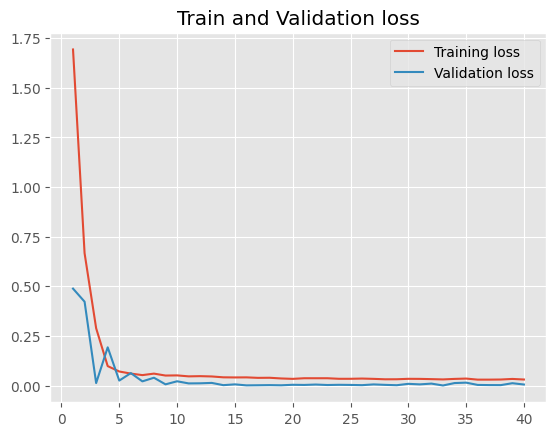

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.style.use('ggplot')
plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Train and Validation loss')

plt.legend()
plt.show()

In [19]:
from keras import layers, Model, optimizers
from keras.callbacks import EarlyStopping

epochs = 40

# Define the input layer for the neural network model with the shape determined by the sequence length and the number of features in the input data
inputs = layers.Input(shape= (sequence_length, features.shape[-1]))

# Define the neural network architecture using LSTM layers with dropout regularization
x = layers.GRU(64, recurrent_dropout= 0.25, return_sequences=True,)(inputs)
x = layers.GRU(128, recurrent_dropout= 0.25, return_sequences=True)(x)
x = layers.GRU(256, recurrent_dropout= 0.25)(x)

x = layers.Dense(256)(x)
x = layers.Dropout(0.25)(x)

x = layers.Dense(128)(x)
x = layers.Dropout(0.25)(x)

x = layers.Dense(32)(x)
x = layers.Dropout(0.25)(x)

output = layers.Dense(1)(x)

model = Model(inputs, output)

# Define Adam optimizers with learning_rate = 0.0001
opt = optimizers.Adam(learning_rate= 0.0001)

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer= opt, loss='mse', metrics=['mae'])

# Define EarlyStopping callback to monitor validation mean absolute error and prevent overfitting
# early_stopping = EarlyStopping(monitor= 'val_mae', patience= 5, mode='min')

# Train the model on the test dataset with a specified number of epochs and early stopping mechanism
history = model.fit(train_dataset,
                    epochs= epochs,
                    shuffle= True,
                    validation_data= test_dataset)
                    # callbacks= early_stopping)

Epoch 1/40
32/32 [==============================] - 11s 106ms/step - loss: 1.8714 - mae: 1.2191 - val_loss: 0.7672 - val_mae: 0.8656
Epoch 2/40
32/32 [==============================] - 3s 80ms/step - loss: 0.6329 - mae: 0.7757 - val_loss: 0.4548 - val_mae: 0.6694
Epoch 3/40
32/32 [==============================] - 3s 84ms/step - loss: 0.2563 - mae: 0.4631 - val_loss: 0.0270 - val_mae: 0.1393
Epoch 4/40
32/32 [==============================] - 3s 83ms/step - loss: 0.0851 - mae: 0.2297 - val_loss: 0.0653 - val_mae: 0.2383
Epoch 5/40
32/32 [==============================] - 3s 84ms/step - loss: 0.0678 - mae: 0.2090 - val_loss: 0.0040 - val_mae: 0.0491
Epoch 6/40
32/32 [==============================] - 3s 88ms/step - loss: 0.0571 - mae: 0.1914 - val_loss: 0.0076 - val_mae: 0.0766
Epoch 7/40
32/32 [==============================] - 3s 85ms/step - loss: 0.0595 - mae: 0.1922 - val_loss: 0.0064 - val_mae: 0.0677
Epoch 8/40
32/32 [==============================] - 4s 111ms/step - loss: 0.0486 

In [ ]:
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss)+1)

plt.style.use('ggplot')
plt.figure()

plt.plot(epochs, loss, label='Training MAE')
plt.plot(epochs, val_loss, label='Test MAE')
plt.title('Train and Test MAE')

plt.legend()
plt.show()